In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#pd.read_hdf("/content/drive/My Drive/ANN project2/SVHN_single_grey1.h5")
import h5py

f = h5py.File("/content/drive/My Drive/ANN project2/SVHN_single_grey1.h5")

In [45]:
for i in f.keys():
  print(i)
    

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
X_test=f["X_test"].value

In [0]:
X_train=f["X_train"].value
X_val=f["X_val"].value
y_test=f["y_test"].value
y_train=f["y_train"].value
y_val=f["y_val"].value

In [48]:
X_train.shape

(42000, 32, 32)

In [49]:
X_test.shape

(18000, 32, 32)

In [50]:
X_val.shape

(60000, 32, 32)

In [51]:
y_val.shape

(60000,)

In [11]:
y_train.shape

(42000,)

<function matplotlib.pyplot.show>

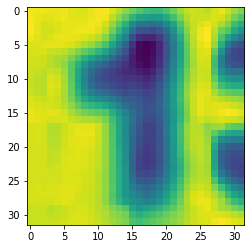

In [12]:
plt.imshow(X_val[5002])
plt.show

In [13]:
y_val[5002]

1

In [14]:
!pip3 install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 450kB 66.5MB/s 
     |████████████████████████████████| 3.8MB 61.6MB/s 


In [0]:
import tensorflow as tf

In [0]:
y_train1= tf.keras.utils.to_categorical(y_train)
y_test1= tf.keras.utils.to_categorical(y_test)

In [0]:
m=tf.keras.models.Sequential()

In [0]:
m.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))
m.add(tf.keras.layers.BatchNormalization())

In [0]:
m.add(tf.keras.layers.Dense(300, activation='relu'))
m.add(tf.keras.layers.Dropout(0.3))
m.add(tf.keras.layers.BatchNormalization())

In [0]:
m.add(tf.keras.layers.Dense(200, activation='relu'))
m.add(tf.keras.layers.Dropout(0.3))
m.add(tf.keras.layers.BatchNormalization())

In [0]:
m.add(tf.keras.layers.Dense(50, activation='relu'))
m.add(tf.keras.layers.Dropout(0.3))
m.add(tf.keras.layers.BatchNormalization())

In [0]:
m.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
m.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 320us/sample - loss: 2.0605 - accuracy: 0.2771 - val_loss: 1.3141 - val_accuracy: 0.6102
Epoch 2/100
42000/42000 [==============================] - 11s 266us/sample - loss: 1.5166 - accuracy: 0.4985 - val_loss: 1.0763 - val_accuracy: 0.6790
Epoch 3/100
42000/42000 [==============================] - 11s 266us/sample - loss: 1.3410 - accuracy: 0.5710 - val_loss: 0.9655 - val_accuracy: 0.7123
Epoch 4/100
42000/42000 [==============================] - 11s 269us/sample - loss: 1.2431 - accuracy: 0.6052 - val_loss: 0.8877 - val_accuracy: 0.7434
Epoch 5/100
42000/42000 [==============================] - 11s 265us/sample - loss: 1.1838 - accuracy: 0.6271 - val_loss: 0.8422 - val_accuracy: 0.7589
Epoch 6/100
42000/42000 [==============================] - 12s 275us/sample - loss: 1.1345 - accuracy: 0.6417 - val_loss: 0.7985 - val_accuracy: 0.7704
Epoch 7/100
42000/42000 [=============

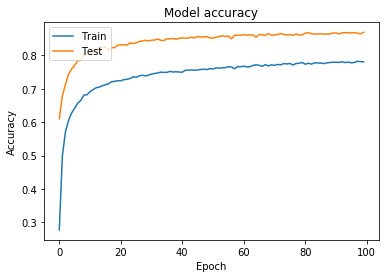

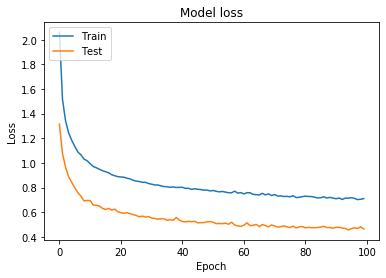

In [24]:
history = m.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=100, batch_size=32)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
m.save('Arpit_StreetView.h5')

In [0]:
from google.colab import files

files.download('Arpit_StreetView.h5')

In [0]:
m2=tf.keras.models.Sequential()
m2.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))
m2.add(tf.keras.layers.BatchNormalization())
m2.add(tf.keras.layers.Dense(300, activation='relu'))
m2.add(tf.keras.layers.Dropout(0.5))
m2.add(tf.keras.layers.BatchNormalization())
m2.add(tf.keras.layers.Dense(200, activation='relu'))
m2.add(tf.keras.layers.Dropout(0.5))
m2.add(tf.keras.layers.BatchNormalization())
m2.add(tf.keras.layers.Dense(50, activation='relu'))
m2.add(tf.keras.layers.Dropout(0.5))
m2.add(tf.keras.layers.BatchNormalization())
m2.add(tf.keras.layers.Dense(10, activation='softmax'))
m2.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
m2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               307500    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)              

In [36]:
history2 = m2.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=200, batch_size=32)



Train on 42000 samples, validate on 18000 samples
Epoch 1/200
42000/42000 [==============================] - 17s 406us/sample - loss: 2.3822 - accuracy: 0.1361 - val_loss: 1.9559 - val_accuracy: 0.3081
Epoch 2/200
42000/42000 [==============================] - 15s 346us/sample - loss: 2.0189 - accuracy: 0.2556 - val_loss: 1.6964 - val_accuracy: 0.4060
Epoch 3/200
42000/42000 [==============================] - 14s 341us/sample - loss: 1.8457 - accuracy: 0.3371 - val_loss: 1.4885 - val_accuracy: 0.5190
Epoch 4/200
42000/42000 [==============================] - 14s 333us/sample - loss: 1.7509 - accuracy: 0.3804 - val_loss: 1.4021 - val_accuracy: 0.5644
Epoch 5/200
42000/42000 [==============================] - 14s 344us/sample - loss: 1.6762 - accuracy: 0.4119 - val_loss: 1.3318 - val_accuracy: 0.5832
Epoch 6/200
42000/42000 [==============================] - 14s 345us/sample - loss: 1.6438 - accuracy: 0.4305 - val_loss: 1.3401 - val_accuracy: 0.6044
Epoch 7/200
42000/42000 [=============

AttributeError: ignored

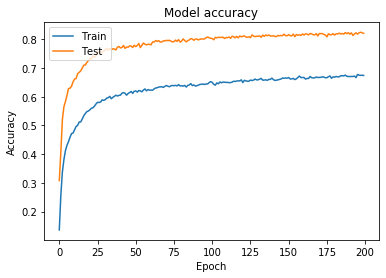

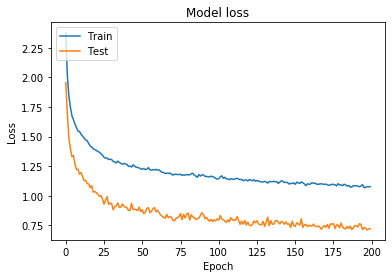

In [38]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
m3=tf.keras.models.Sequential()
m3.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))
m3.add(tf.keras.layers.BatchNormalization())
lrelu=tf.keras.layers.LeakyReLU(alpha=0.3)
m3.add(tf.keras.layers.Dense(1024, activation=lrelu))
m3.add(tf.keras.layers.Dense(512, activation=lrelu))
m3.add(tf.keras.layers.Dense(512, activation=lrelu))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation=lrelu))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(32, activation=lrelu))
m3.add(tf.keras.layers.Dense(10, activation='softmax'))
m3.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history3 = m3.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=200, batch_size=32)

# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 42000 samples, validate on 18000 samples
Epoch 1/200
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.3406 - accuracy: 0.5622 - val_loss: 1.1982 - val_accuracy: 0.6303
Epoch 2/200
42000/42000 [==============================] - 55s 1ms/sample - loss: 0.9767 - accuracy: 0.6934 - val_loss: 0.8175 - val_accuracy: 0.7502
Epoch 3/200
42000/42000 [==============================] - 55s 1ms/sample - loss: 0.8595 - accuracy: 0.7286 - val_loss: 0.6973 - val_accuracy: 0.7916
Epoch 4/200
42000/42000 [==============================] - 58s 1ms/sample - loss: 0.7799 - accuracy: 0.7543 - val_loss: 0.6493 - val_accuracy: 0.8023
Epoch 5/200
42000/42000 [==============================] - 58s 1ms/sample - loss: 0.7336 - accuracy: 0.7698 - val_loss: 0.6467 - val_accuracy: 0.8023
Epoch 6/200
42000/42000 [==============================] - 58s 1ms/sample - loss: 0.6944 - accuracy: 0.7817 - val_loss: 0.6161 - val_accuracy: 0.8139
Epoch 7/200
42000/42000 [=========================